In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('book_w_images.csv')

In [19]:
df.head()

,author,bookformat,desc,img,isbn,isbn13,link,pages,rating,reviews,...,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18,genre_19,cover_image
0,Robert Reed,Paperback,ship traveled universe longer crew recall true...,https://i.gr-assets.com/images/S/compressed.ph...,812566572,9.780000e+12,https://goodreads.com/book/show/100208.Marrow,512,3.82,110,...,Science Fiction,Aliens,Speculative Fiction,NaN,NaN,NaN,NaN,NaN,NaN,cover_images/processed_image_111.jpg
1,"Wu Cheng'en,Arthur Waley,Hu Shih",Paperback,probably popular book history far east classic...,https://i.gr-assets.com/images/S/compressed.ph...,802130860,9.780000e+12,https://goodreads.com/book/show/100237.Monkey,306,4.02,552,...,Asia,Novels,Adventure,NaN,NaN,NaN,NaN,NaN,NaN,cover_images/processed_image_139.jpg
2,Beth Fantaskey,Hardcover,one thing find vampire princess whole thing ac...,https://i.gr-assets.com/images/S/compressed.ph...,547393091,9.780000e+12,https://goodreads.com/book/show/10025007-jessi...,309,3.90,853,...,Fantasy,Urban Fantasy,Fiction,Mystery,NaN,NaN,NaN,NaN,NaN,cover_images/processed_image_160.jpg
3,Lindsay Buroker,Kindle Edition,adventure starts imperial law enforcer amarant...,https://i.gr-assets.com/images/S/compressed.ph...,NaN,NaN,https://goodreads.com/book/show/10031259-the-e...,324,4.04,1378,...,Fantasy,Urban Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cover_images/processed_image_236.jpg
4,Larry Niven,Paperback,phssthpok pak traveling thousand years mission...,https://i.gr-assets.com/images/S/compressed.ph...,345353129,9.780000e+12,https://goodreads.com/book/show/100344.Protector,224,4.07,252,...,Speculative Fiction,Audiobook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cover_images/processed_image_276.jpg


In [20]:
# Normalize the 'rating' column
scaler = StandardScaler()
df['rating'] = scaler.fit_transform(df['rating'].values.reshape(-1, 1))

In [21]:
# Load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=(224, 224))  # Adjust target_size as needed
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)


In [22]:
# Load and preprocess the data
X = load_and_preprocess_images(df['cover_image'])
y = df['rating'].values

FileNotFoundError: [Errno 2] No such file or directory: 'cover_images/processed_image_111.jpg'

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the CNN model for regression
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='linear'))  # Output layer for regression using linear activation


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mae'])  # Use mean absolute error as a metric

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


119/119 [==============================] - 51s 413ms/step - loss: 154899.4062 - mae: 48.2682 - val_loss: 1.1799 - val_mae: 0.8625
Epoch 2/10
119/119 [==============================] - 48s 403ms/step - loss: 1.0413 - mae: 0.8114 - val_loss: 1.1236 - val_mae: 0.8420
Epoch 3/10
119/119 [==============================] - 48s 405ms/step - loss: 0.9474 - mae: 0.7708 - val_loss: 1.1053 - val_mae: 0.8351
Epoch 4/10
119/119 [==============================] - 48s 403ms/step - loss: 0.8645 - mae: 0.7307 - val_loss: 1.0988 - val_mae: 0.8307
Epoch 5/10
119/119 [==============================] - 48s 402ms/step - loss: 0.7966 - mae: 0.6942 - val_loss: 1.1420 - val_mae: 0.8436
Epoch 6/10
119/119 [==============================] - 50s 425ms/step - loss: 0.7217 - mae: 0.6535 - val_loss: 1.1497 - val_mae: 0.8444
Epoch 7/10
119/119 [==============================] - 49s 409ms/step - loss: 0.6655 - mae: 0.6239 - val_loss: 1.2212 - val_mae: 0.8773
Epoch 8/10
119/119 [===========================

In [ ]:
import requests
from PIL import Image

In [ ]:
new_books = {'title': ['Iron Widow', 'The Long Way to a Small Angry Planet', 'Tress of the Emerald Sea'], 'bookformat': ['hardback', 'paperback', 'hardback'], 
'pages': [391, 518, 483], 
'reviews':[17322, 21239, 15256], 'totalratings': [77713, 143843, 98422], 
'img': ['https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1617986668i/52459864.jpg', 
'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1405532474i/22733729.jpg', 
'https://images-na.ssl-images-amazon.com/images/S/compressed.photo.goodreads.com/books/1672574587i/60531406.jpg']}
df_new = pd.DataFrame(new_books)

In [ ]:
df_new.head()

,title,bookformat,pages,reviews,totalratings,img
0,Iron Widow,hardback,391,17322,77713,https://images-na.ssl-images-amazon.com/images...
1,The Long Way to a Small Angry Planet,paperback,518,21239,143843,https://images-na.ssl-images-amazon.com/images...
2,Tress of the Emerald Sea,hardback,483,15256,98422,https://images-na.ssl-images-amazon.com/images...


In [ ]:
def download_images_and_process(df_new, url_column, output_folder):
    total_processed = 0  # Initialize a counter for total records processed

    for index, row in df_new.iterrows():
        image_url = row[url_column]
        response = requests.get(image_url)

        if response.status_code == 200:
            try:
                # Downloaded image file path
                file_path = f'{output_folder}/image_{index}.jpg'

                # Save the image file
                with open(file_path, 'wb') as file:
                    file.write(response.content)

                # Image processing
                image = Image.open(file_path)

                # Convert the image to RGB
                image = image.convert('RGB')

                # Resize the image to a consistent size (e.g., 100x100 pixels)
                image = image.resize((100, 100))
                
                # Save the processed image
                processed_file_path = f'{output_folder}/processed_image_{index}.jpg'
                image.save(processed_file_path)

                print(f'Image {index} downloaded and processed successfully. Saved to {processed_file_path}')

                # Update DataFrame with processed image path
                df_new.at[index, 'cover_image'] = processed_file_path

                # Increment the counter
                total_processed += 1

                # Print the total number of records processed at each iteration
                print(f'Total number of records processed so far: {total_processed}')

            except Exception as e:
                print(f'Error processing image {index}: {str(e)}')

        else:
            print(f'Failed to download image {index}. Status code: {response.status_code}')

    print(f'Total number of records processed: {total_processed}')

In [ ]:
output_folder = 'new_book_covers'

url_column = 'img'

download_images_and_process(df_new, url_column, output_folder)

Image 0 downloaded and processed successfully. Saved to new_book_covers/processed_image_0.jpg
Total number of records processed so far: 1
Image 1 downloaded and processed successfully. Saved to new_book_covers/processed_image_1.jpg
Total number of records processed so far: 2
Image 2 downloaded and processed successfully. Saved to new_book_covers/processed_image_2.jpg
Total number of records processed so far: 3
Total number of records processed: 3


In [ ]:
df_new.head()

,title,bookformat,pages,reviews,totalratings,img,cover_image
0,Iron Widow,hardback,391,17322,77713,https://images-na.ssl-images-amazon.com/images...,new_book_covers/processed_image_0.jpg
1,The Long Way to a Small Angry Planet,paperback,518,21239,143843,https://images-na.ssl-images-amazon.com/images...,new_book_covers/processed_image_1.jpg
2,Tress of the Emerald Sea,hardback,483,15256,98422,https://images-na.ssl-images-amazon.com/images...,new_book_covers/processed_image_2.jpg


In [ ]:
df_new = df_new.drop(['img'], axis = 1)

In [ ]:
df_new

,title,bookformat,pages,reviews,totalratings,cover_image
0,Iron Widow,hardback,391,17322,77713,new_book_covers/processed_image_0.jpg
1,The Long Way to a Small Angry Planet,paperback,518,21239,143843,new_book_covers/processed_image_1.jpg
2,Tress of the Emerald Sea,hardback,483,15256,98422,new_book_covers/processed_image_2.jpg


In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size = (224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    
    return img_array

for index, row in df_new.iterrows():
    cover_path = row['cover_image']
    book_title = row['title']
    
    new_cover = preprocess_image(cover_path)
    predicted_rating = model.predict(new_cover)
    predicted_rating = scaler.inverse_transform(predicted_rating.reshape(-1, 1))
    
    print(f'Predicted Rating for {book_title}: {predicted_rating[0][0]}')

1/1 [==============================] - 0s 22ms/step
Predicted Rating for Iron Widow: 3.912872076034546
1/1 [==============================] - 0s 28ms/step
Predicted Rating for The Long Way to a Small Angry Planet: 3.8456685543060303
1/1 [==============================] - 0s 23ms/step
Predicted Rating for Tress of the Emerald Sea: 3.9531025886535645


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [ ]:
img_path = 'C:/Users/runek/DSC680/Project 2/new_book_covers/processed_image_0.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
# Get the model predictions
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions)

NameError: name 'model' is not defined

Text(0.5, 1.0, 'Original Image')

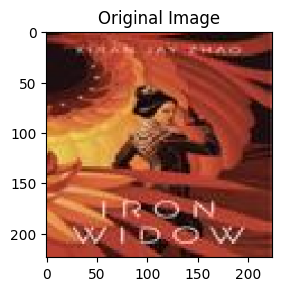

In [ ]:
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

In [ ]:
# Display the top predicted class and its activation map
top_prediction = decoded_predictions[0][0]
top_class_index = np.argmax(predictions[0])
cam_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv3').output)
cam_features = cam_model.predict(img_array)

# Display the top predicted class and its activation map
top_prediction = decoded_predictions[0][0]
top_class_index = np.argmax(predictions[0])
cam_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('block5_conv3').output)
cam_features = cam_model.predict(img_array)

cam_output = cam_features[0, :, :, top_class_index]
cam_output = np.maximum(cam_output, 0)  # apply ReLU
cam_output /= np.max(cam_output)  # normalize

# Upsample the CAM to match the original image size
upsampled_cam = tf.image.resize(cam_output, (224, 224))

# Display the input image and the CAM side by side
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(upsampled_cam, cmap='jet', alpha=0.5)  # overlay the CAM on the original image
plt.title(f'Predicted: {top_prediction[1]} ({top_prediction[2]:.2%})')

plt.show()